In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polilagrange(a,b,spaz,u,k):
    # 1) sia dato un array di nodi di interpolazione:
    x=np.arange(a,b,spaz)
    print("x = ",x)
    nint = len(x)
    print("nint = ",nint)
    # 2) sia "k" l'indice del polinomo di Lagrange
    # 3) costruiamo un vettore di indici di tutti i nodi escluso "k" (k si esclude pusando arange che crea un array che non include il termine finale, che viene specificato come k in questo caso):
    I = np.hstack((np.arange(0,k),np.arange(k+1,nint)))
    print("I = ",I)
    # 4) scegliamo il punto "u" nel quale calcolare il polinomio di Lagrange
    # 5) a questo punto, "x[I]" e' un vettore con tutti i nodi di interpolazione tranne il k-esimo:
    print("x[I] = ",x[I])
    # e ci possiamo costruire un vettore di frazioni di monomi, ognuna relativa ad un 
    # nodo di interpolazione (escluso il k-esimo):
    print((u-x[I])/(x[k]-x[I]))
    # che moltiplicate tra loro ("np.cumprod" produce un vettore di prodotti parziali, di cui prendiamo 
    # l'ultima componente che contiene i prodotti di tutti i monomi) danno il valore "w_k" del polinomio 
    # di Lagrange calcolato in "u":
    w_k = np.cumprod((u-x[I])/(x[k]-x[I]))[-1]
    print("W_K = ",w_k)

polilagrange(0.0,10,2,7.2,3)

x =  [0. 2. 4. 6. 8.]
nint =  5
I =  [0 1 2 4]
x[I] =  [0. 2. 4. 8.]
[1.2 1.3 1.6 0.4]
W_K =  0.9984


ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

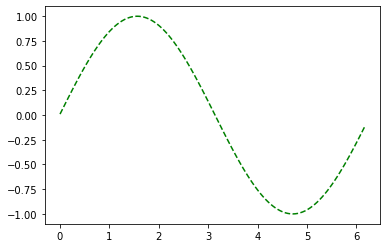

In [3]:
def calc_pol_Lagrange(u,k,x):
    # calcola il valore in "u" del k-esimo polinomio
    nint = len(x)
    n = len(np.array([u]))
    v=np.zeros(n)
    if type(u)==float:
        I = np.hstack((np.arange(0,k), np.arange(k+1,nint)))
        w_k = np.cumprod( (u-x[I])/(x[k]-x[I]) )[-1]
    else:
        w_k = np.ones(len(np.array([u]))) #nint
        for j in np.hstack((np.arange(0,k),np.arange(k+1,nint))):
            w_k = (u-x[j])/(x[k]-x[j])*w_k
        #endfor
    #endif
    xf=np.arange(x[0],x[-1],0.05)
    plt.plot(xf,f(xf),'g--')
    plt.plot(u,v)
    plt.show()
    
u=np.arange(0.01,2*np.pi,0.2)
k=3
x=np.arange(0.01,2*np.pi,0.1)
f=lambda x:np.sin(x)
y=f(x)
calc_pol_Lagrange(u,k,x)

u=np.arange(-4.5,4.5,0.1)
k=3
x=np.arange(-5,6,0.9)
f=lambda x:1./(1+x**2)
y=f(x)
calc_pol_Lagrange(u,k,x)